C:\Users\anzah\Documents\research\mit_bidmc_neurodynamics_2025\MIT002\_preprocessed\new_session_framedata\ROB7-8_from0.2_to0.3_drive.json


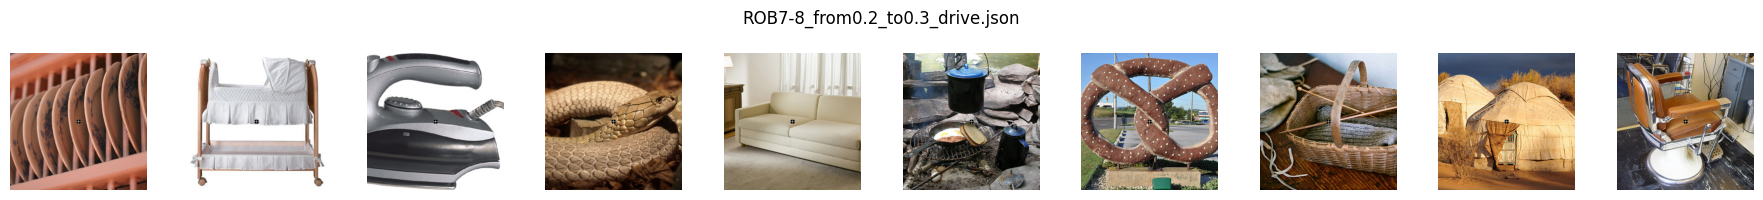

C:\Users\anzah\Documents\research\mit_bidmc_neurodynamics_2025\MIT002\_preprocessed\new_session_framedata\ROB7-8_from0.2_to0.3_high.json


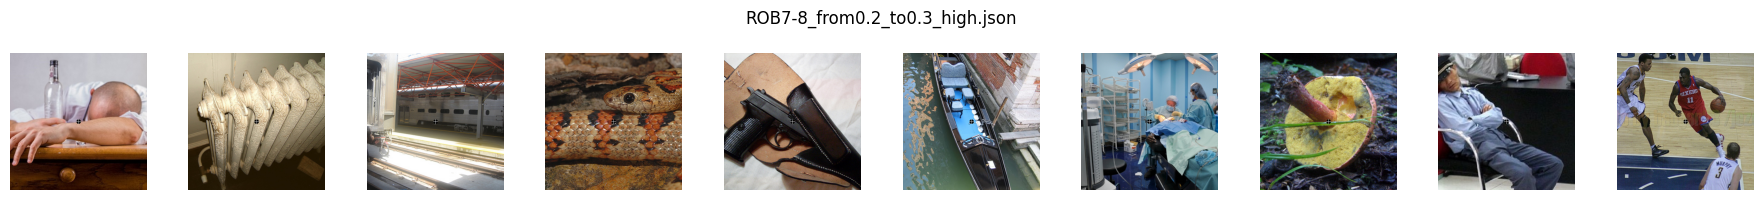

C:\Users\anzah\Documents\research\mit_bidmc_neurodynamics_2025\MIT002\_preprocessed\new_session_framedata\ROB7-8_from0.2_to0.3_low.json


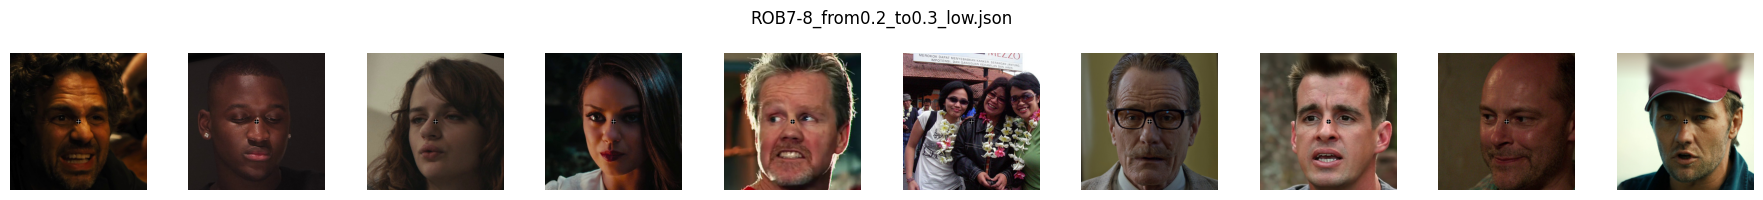

C:\Users\anzah\Documents\research\mit_bidmc_neurodynamics_2025\MIT002\_preprocessed\new_session_framedata\ROB7-8_from0.2_to0.3_suppress.json


TypeError: 'NoneType' object is not subscriptable

In [3]:
import os
import json
import torch
import numpy as np
from PIL import Image
import cv2

import screen_setup

import glob

max_n_images = 10
import matplotlib.pyplot as plt

folder_path = r"C:\Users\anzah\Documents\research\mit_bidmc_neurodynamics_2025\MIT002\_preprocessed\new_session_framedata"
json_files = glob.glob(os.path.join(folder_path, "*.json"))

for json_file in json_files:
    with open(json_file, "r") as f:
        framedata = json.load(f)['framedata']
    print(json_file)

    images = []
    for frame in framedata[:max_n_images]:
        images.append(cv2.cvtColor(screen_setup.preprocess_image(frame, cross=True), cv2.COLOR_RGB2BGR))

    n_cols = max_n_images
    n_rows = int(np.ceil(len(images) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.8 * n_cols, 2 * n_rows))
    for i, ax in enumerate(axes.flatten()):
        if i < len(images):
            ax.imshow(images[i])
        ax.axis('off')
    plt.suptitle(os.path.basename(json_file))
    plt.tight_layout()
    plt.show()
